# PROJECT: Forecasting System Retail - Social Network Analysis (Store 2)

# 1. Initial Formatting of Jupyter Notebook

In [1]:
# Import of Paketegs
import numpy as np
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

In [2]:
# Visualization Formatting
pd.set_option('max_columns',30)

In [3]:
# Visualization Formatting
pd.set_option('display.precision', 2)

In [4]:
# Visualization Formatting
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# 2. MYSQL Connection

In [5]:
#CORPORATE CONFIDENTIAL DATASET
#CONFIDENTIAL ACCESS DATA
# MySQL connection
db_connection = pymysql.connect(host='xxx.x.x.x',
                                user='xxxxxx',
                                password='xxxxx',
                                database='xxxx')

cursor = db_connection.cursor()
cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'xxxxx'")
for table in [tables[0] for tables in cursor.fetchall()]:
    print(table)

Desc_Conc
Precos_Conc
df_corrM_L4
df_test
df_training
new_sample_df
new_sample_df1
new_sample_df2
prediction
store_2
test_global
test_v2
teste_queijos
training_global
training_v2
treino_queijos


In [6]:
# Tables loading with store 2
store_2 = pd.read_sql('SELECT * FROM store_2', con = db_connection)

# 3. Data cleaning

In [7]:
# CHANGE DATATYPE
df_type = store_2.astype({"STORE_KEY":'category', 
                                   "SKU_KEY":'object', 
                                   "REL_DAY":'object', 
                                   "SLS_VAL":'float', 
                                   "SLS_QTY":'float', 
                                   "COST_SLS_VAL":'float', 
                                   "TRAN_TYPE":'category', 
                                   "SOH_QTY":'float', 
                                   "SOH_VAL":'float', 
                                   "MERCH_L2_KEY":'object', 
                                   "MERCH_L2_DESC":'object', 
                                   "MERCH_L3_KEY":'object', 
                                   "MERCH_L3_DESC":'object', 
                                   "MERCH_L4_KEY":'object', 
                                   "MERCH_L4_DESC":'object', 
                                   "MERCH_L5_KEY":'object', 
                                   "MERCH_L5_DESC":'object', 
                                   "PACKAGE_UOM":'category',})
print()

In [8]:
# replace negative values ​​of soh_qty with zero
df_type.at[df_type[df_type['SOH_QTY']<0].index,'SOH_QTY'] = 0
# Eliminate lines from Cost_SLS_VAL with negative values ​​and zeros
df_type.drop(df_type[df_type['COST_SLS_VAL']<=0].index, inplace=True)
# eliminate SOH_VAL lines with negative values ​​and zeros
df_type.drop(df_type[df_type['SOH_VAL']<=0].index, inplace=True)
# Eliminate SLS_QTY lines with zero values
df_type.drop(df_type[df_type['SLS_QTY']==0].index, inplace=True)
# Eliminate SLS_VAL lines with zero values
df_type.drop(df_type[df_type['SLS_VAL']==0].index, inplace=True)

In [9]:
filtered_df = df_type.loc[df_type['MERCH_L3_DESC'] == 'FLC']
filtered_df

,STORE_KEY,SKU_KEY,REL_DAY,SLS_VAL,SLS_QTY,COST_SLS_VAL,TRAN_TYPE,SOH_QTY,SOH_VAL,SKU_DESC,MERCH_L2_KEY,MERCH_L2_DESC,MERCH_L3_KEY,MERCH_L3_DESC,MERCH_L4_KEY,MERCH_L4_DESC,MERCH_L5_KEY,MERCH_L5_DESC,PACKAGE_SIZE,PACKAGE_UOM,PACKAGE_NO_UNITS,DAY_DATE
3,2,551,2505,21.00,1.00,12.00,R,7.00,129.00,QUEIJO VENEZA MINAS FRESCAL LIGHT KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1219,MINAS,"10,000.00",KG,10.00,2019-11-10
7,2,581,2505,168.00,42.00,101.00,R,"1,718.00","4,144.00",QUEIJO VENEZA MUSSARELA FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"1,500,000.00",UN,10.00,2019-11-10
8,2,582,2505,40.00,10.00,24.00,R,316.00,768.00,QUEIJO VENEZA PRATO FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"1,500,000.00",UN,10.00,2019-11-10
16,2,221,2505,60.00,4.00,35.00,P,19.00,163.00,LINGUICA FRIMESA CALABRESA COZ DEF KG,2,PERECIVEIS,5,FLC,107,DEFUMADOS,1266,LINGUICA CALABRESA,"10,000.00",KG,10.00,2019-11-10
23,2,252,2505,21.00,2.00,13.00,R,2.00,12.00,RICOTA VENEZA C/SAL KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1221,RICOTA,"10,000.00",KG,10.00,2019-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868725,2,15725,3222,98.00,6.00,61.00,R,359.00,"3,649.00",QUEIJO DELLA VITA MUSSARELA FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"4,000,000.00",UN,10.00,2021-10-27
2868729,2,1195,3222,76.00,2.00,45.00,R,22.00,545.00,QUEIJO DELLA VITA COLONIAL FRESCO KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1218,COLONIAL,"10,000.00",KG,10.00,2021-10-27
2868733,2,15726,3222,98.00,6.00,61.00,R,201.00,"2,043.00",QUEIJO DELLA VITA PRATO FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"4,000,000.00",UN,10.00,2021-10-27
2868734,2,15730,3222,14.00,4.00,7.00,R,18.00,34.00,BEB LACTEA DELLA VITA MORANGO PCT 900G,2,PERECIVEIS,5,FLC,103,IOGURTES,1201,BEBIDA LACTEA,"9,000,000.00",UN,10.00,2021-10-27


In [10]:
df_NrVendidos = filtered_df.assign(X=1)

In [11]:
count_df  = df_NrVendidos.groupby('SKU_KEY')['X'].count()
count_df1 =count_df.reset_index()
count_df1['COUNT'] = count_df1['X']
count_df1 = count_df1[['SKU_KEY', 'COUNT']]

In [12]:
df_coluna = pd.merge(df_NrVendidos,count_df1, how='left',on='SKU_KEY')
df_coluna

,STORE_KEY,SKU_KEY,REL_DAY,SLS_VAL,SLS_QTY,COST_SLS_VAL,TRAN_TYPE,SOH_QTY,SOH_VAL,SKU_DESC,MERCH_L2_KEY,MERCH_L2_DESC,MERCH_L3_KEY,MERCH_L3_DESC,MERCH_L4_KEY,MERCH_L4_DESC,MERCH_L5_KEY,MERCH_L5_DESC,PACKAGE_SIZE,PACKAGE_UOM,PACKAGE_NO_UNITS,DAY_DATE,X,COUNT
0,2,551,2505,21.00,1.00,12.00,R,7.00,129.00,QUEIJO VENEZA MINAS FRESCAL LIGHT KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1219,MINAS,"10,000.00",KG,10.00,2019-11-10,1,537
1,2,581,2505,168.00,42.00,101.00,R,"1,718.00","4,144.00",QUEIJO VENEZA MUSSARELA FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"1,500,000.00",UN,10.00,2019-11-10,1,697
2,2,582,2505,40.00,10.00,24.00,R,316.00,768.00,QUEIJO VENEZA PRATO FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"1,500,000.00",UN,10.00,2019-11-10,1,703
3,2,221,2505,60.00,4.00,35.00,P,19.00,163.00,LINGUICA FRIMESA CALABRESA COZ DEF KG,2,PERECIVEIS,5,FLC,107,DEFUMADOS,1266,LINGUICA CALABRESA,"10,000.00",KG,10.00,2019-11-10,1,650
4,2,252,2505,21.00,2.00,13.00,R,2.00,12.00,RICOTA VENEZA C/SAL KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1221,RICOTA,"10,000.00",KG,10.00,2019-11-10,1,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367235,2,15725,3222,98.00,6.00,61.00,R,359.00,"3,649.00",QUEIJO DELLA VITA MUSSARELA FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"4,000,000.00",UN,10.00,2021-10-27,1,676
367236,2,1195,3222,76.00,2.00,45.00,R,22.00,545.00,QUEIJO DELLA VITA COLONIAL FRESCO KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1218,COLONIAL,"10,000.00",KG,10.00,2021-10-27,1,657
367237,2,15726,3222,98.00,6.00,61.00,R,201.00,"2,043.00",QUEIJO DELLA VITA PRATO FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"4,000,000.00",UN,10.00,2021-10-27,1,663
367238,2,15730,3222,14.00,4.00,7.00,R,18.00,34.00,BEB LACTEA DELLA VITA MORANGO PCT 900G,2,PERECIVEIS,5,FLC,103,IOGURTES,1201,BEBIDA LACTEA,"9,000,000.00",UN,10.00,2021-10-27,1,645


In [13]:
df_training = df_coluna.loc[(df_coluna['COUNT'] >= 1)]

In [14]:
df_training

,STORE_KEY,SKU_KEY,REL_DAY,SLS_VAL,SLS_QTY,COST_SLS_VAL,TRAN_TYPE,SOH_QTY,SOH_VAL,SKU_DESC,MERCH_L2_KEY,MERCH_L2_DESC,MERCH_L3_KEY,MERCH_L3_DESC,MERCH_L4_KEY,MERCH_L4_DESC,MERCH_L5_KEY,MERCH_L5_DESC,PACKAGE_SIZE,PACKAGE_UOM,PACKAGE_NO_UNITS,DAY_DATE,X,COUNT
0,2,551,2505,21.00,1.00,12.00,R,7.00,129.00,QUEIJO VENEZA MINAS FRESCAL LIGHT KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1219,MINAS,"10,000.00",KG,10.00,2019-11-10,1,537
1,2,581,2505,168.00,42.00,101.00,R,"1,718.00","4,144.00",QUEIJO VENEZA MUSSARELA FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"1,500,000.00",UN,10.00,2019-11-10,1,697
2,2,582,2505,40.00,10.00,24.00,R,316.00,768.00,QUEIJO VENEZA PRATO FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"1,500,000.00",UN,10.00,2019-11-10,1,703
3,2,221,2505,60.00,4.00,35.00,P,19.00,163.00,LINGUICA FRIMESA CALABRESA COZ DEF KG,2,PERECIVEIS,5,FLC,107,DEFUMADOS,1266,LINGUICA CALABRESA,"10,000.00",KG,10.00,2019-11-10,1,650
4,2,252,2505,21.00,2.00,13.00,R,2.00,12.00,RICOTA VENEZA C/SAL KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1221,RICOTA,"10,000.00",KG,10.00,2019-11-10,1,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367235,2,15725,3222,98.00,6.00,61.00,R,359.00,"3,649.00",QUEIJO DELLA VITA MUSSARELA FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"4,000,000.00",UN,10.00,2021-10-27,1,676
367236,2,1195,3222,76.00,2.00,45.00,R,22.00,545.00,QUEIJO DELLA VITA COLONIAL FRESCO KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1218,COLONIAL,"10,000.00",KG,10.00,2021-10-27,1,657
367237,2,15726,3222,98.00,6.00,61.00,R,201.00,"2,043.00",QUEIJO DELLA VITA PRATO FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"4,000,000.00",UN,10.00,2021-10-27,1,663
367238,2,15730,3222,14.00,4.00,7.00,R,18.00,34.00,BEB LACTEA DELLA VITA MORANGO PCT 900G,2,PERECIVEIS,5,FLC,103,IOGURTES,1201,BEBIDA LACTEA,"9,000,000.00",UN,10.00,2021-10-27,1,645


In [15]:
df_training.loc[df_training['TRAN_TYPE'] == 'P', 'PROMOCIONAL'] = 1
df_training[['PROMOCIONAL']] = df_training.loc[:,['PROMOCIONAL']].fillna(value=0)
df_training['PROMOCIONAL'] = pd.to_numeric(df_training['PROMOCIONAL'], downcast='integer')
df_training

,STORE_KEY,SKU_KEY,REL_DAY,SLS_VAL,SLS_QTY,COST_SLS_VAL,TRAN_TYPE,SOH_QTY,SOH_VAL,SKU_DESC,MERCH_L2_KEY,MERCH_L2_DESC,MERCH_L3_KEY,MERCH_L3_DESC,MERCH_L4_KEY,MERCH_L4_DESC,MERCH_L5_KEY,MERCH_L5_DESC,PACKAGE_SIZE,PACKAGE_UOM,PACKAGE_NO_UNITS,DAY_DATE,X,COUNT,PROMOCIONAL
0,2,551,2505,21.00,1.00,12.00,R,7.00,129.00,QUEIJO VENEZA MINAS FRESCAL LIGHT KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1219,MINAS,"10,000.00",KG,10.00,2019-11-10,1,537,0
1,2,581,2505,168.00,42.00,101.00,R,"1,718.00","4,144.00",QUEIJO VENEZA MUSSARELA FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"1,500,000.00",UN,10.00,2019-11-10,1,697,0
2,2,582,2505,40.00,10.00,24.00,R,316.00,768.00,QUEIJO VENEZA PRATO FAT PCT 150G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"1,500,000.00",UN,10.00,2019-11-10,1,703,0
3,2,221,2505,60.00,4.00,35.00,P,19.00,163.00,LINGUICA FRIMESA CALABRESA COZ DEF KG,2,PERECIVEIS,5,FLC,107,DEFUMADOS,1266,LINGUICA CALABRESA,"10,000.00",KG,10.00,2019-11-10,1,650,1
4,2,252,2505,21.00,2.00,13.00,R,2.00,12.00,RICOTA VENEZA C/SAL KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1221,RICOTA,"10,000.00",KG,10.00,2019-11-10,1,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367235,2,15725,3222,98.00,6.00,61.00,R,359.00,"3,649.00",QUEIJO DELLA VITA MUSSARELA FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1214,MUSSARELA,"4,000,000.00",UN,10.00,2021-10-27,1,676,0
367236,2,1195,3222,76.00,2.00,45.00,R,22.00,545.00,QUEIJO DELLA VITA COLONIAL FRESCO KG,2,PERECIVEIS,5,FLC,105,QUEIJOS,1218,COLONIAL,"10,000.00",KG,10.00,2021-10-27,1,657,0
367237,2,15726,3222,98.00,6.00,61.00,R,201.00,"2,043.00",QUEIJO DELLA VITA PRATO FAT 400G,2,PERECIVEIS,5,FLC,105,QUEIJOS,1215,PRATO,"4,000,000.00",UN,10.00,2021-10-27,1,663,0
367238,2,15730,3222,14.00,4.00,7.00,R,18.00,34.00,BEB LACTEA DELLA VITA MORANGO PCT 900G,2,PERECIVEIS,5,FLC,103,IOGURTES,1201,BEBIDA LACTEA,"9,000,000.00",UN,10.00,2021-10-27,1,645,0


# 4. Data Transformation

In [16]:
# Transposition of the variable SLS_QTY in columns for the calculation of the correlation between products
df_SLS_QTY_0 = df_training.pivot(index='DAY_DATE',columns='SKU_DESC',values='SLS_QTY')
df_SLS_QTY_0

SKU_DESC,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ORIGINAL PT 100ML,ACAI FROOTY ORIGINAL PT 2L,ACAI FROOTY ORIGINAL PT 700ML,ACAI FROOTY PT 100ML,ACAI FRUTOOS BANANA C/GRANOLA PT 220ML,ACAI FRUTOOS BANANA PT 750ML,ACAI FRUTOOS MORANGO PT 750ML,ACAI FRUTOOS NATURAL C/GRANOLA PT 220ML,ACAI FRUTOOS NATURAL C/LEITE PO PT 220ML,ACAI FRUTOOS NATURAL C/PACOCA PT 220ML,ACAI FRUTOOS NATURAL PT 1.5L,...,TORRESMO DTALIA MISTO KG,TORRESMO DTALIA PURURUCA ESPECIAL KG,TORRESMO SULFRIOS PRENSADO KG,TORRESMO WEBER PRENSADO CRY KG,TORRESMO WEBER PURURUCA PT 130G,TORTA SADIA FRANGO CX 500G,TORTA SADIA PALMITO CX 500G,WAFFLE FORNO MINAS TRAD PCT 210G,WAFFLE FORNO MINAS TRAD PCT 280G,X BURGUER FAROESTE FRANGO PCT 130G,X BURGUER FAROESTE PCT 130G,X BURGUER FAROESTE PICANHA PCT 130G,YAKISSOBA SADIA CX 600G,YAKISSOBA SEARA CX 500G,YAKISSOBA SEARA M GOURMET CX 350G
DAY_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-10,1.00,nan,1.00,nan,7.00,nan,nan,nan,1.00,1.00,nan,nan,nan,nan,4.00,...,nan,1.00,nan,1.00,nan,nan,1.00,3.00,nan,nan,nan,nan,nan,nan,1.00
2019-11-11,nan,1.00,1.00,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,1.00,...,nan,nan,nan,1.00,3.00,1.00,nan,8.00,nan,nan,nan,nan,nan,nan,1.00
2019-11-12,nan,nan,nan,1.00,nan,nan,nan,nan,nan,2.00,nan,nan,1.00,nan,2.00,...,1.00,nan,1.00,1.00,1.00,nan,1.00,nan,nan,nan,nan,nan,nan,nan,2.00
2019-11-13,1.00,nan,nan,nan,nan,nan,nan,nan,nan,3.00,nan,1.00,3.00,nan,1.00,...,nan,nan,nan,1.00,4.00,nan,nan,nan,nan,nan,nan,nan,nan,1.00,3.00
2019-11-14,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,...,1.00,nan,nan,1.00,4.00,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,3.00,...,nan,nan,nan,1.00,nan,1.00,nan,nan,1.00,5.00,8.00,25.00,nan,nan,nan
2021-10-24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,...,nan,nan,1.00,1.00,1.00,nan,nan,nan,1.00,8.00,10.00,13.00,nan,nan,nan
2021-10-25,1.00,nan,nan,nan,nan,nan,nan,nan,3.00,nan,nan,nan,nan,nan,1.00,...,nan,nan,nan,nan,1.00,nan,nan,nan,2.00,8.00,17.00,7.00,nan,nan,nan


In [17]:
# Transposition of the variable SLS_QTY in columns for the calculation of the correlation between products
df_Promotional_0 = df_training.pivot(index='DAY_DATE',columns='SKU_DESC',values='PROMOCIONAL')
df_Promotional_0

SKU_DESC,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ORIGINAL PT 100ML,ACAI FROOTY ORIGINAL PT 2L,ACAI FROOTY ORIGINAL PT 700ML,ACAI FROOTY PT 100ML,ACAI FRUTOOS BANANA C/GRANOLA PT 220ML,ACAI FRUTOOS BANANA PT 750ML,ACAI FRUTOOS MORANGO PT 750ML,ACAI FRUTOOS NATURAL C/GRANOLA PT 220ML,ACAI FRUTOOS NATURAL C/LEITE PO PT 220ML,ACAI FRUTOOS NATURAL C/PACOCA PT 220ML,ACAI FRUTOOS NATURAL PT 1.5L,...,TORRESMO DTALIA MISTO KG,TORRESMO DTALIA PURURUCA ESPECIAL KG,TORRESMO SULFRIOS PRENSADO KG,TORRESMO WEBER PRENSADO CRY KG,TORRESMO WEBER PURURUCA PT 130G,TORTA SADIA FRANGO CX 500G,TORTA SADIA PALMITO CX 500G,WAFFLE FORNO MINAS TRAD PCT 210G,WAFFLE FORNO MINAS TRAD PCT 280G,X BURGUER FAROESTE FRANGO PCT 130G,X BURGUER FAROESTE PCT 130G,X BURGUER FAROESTE PICANHA PCT 130G,YAKISSOBA SADIA CX 600G,YAKISSOBA SEARA CX 500G,YAKISSOBA SEARA M GOURMET CX 350G
DAY_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-10,1.00,nan,1.00,nan,0.00,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,0.00,...,nan,0.00,nan,0.00,nan,nan,0.00,1.00,nan,nan,nan,nan,nan,nan,0.00
2019-11-11,nan,0.00,1.00,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,...,nan,nan,nan,0.00,0.00,0.00,nan,1.00,nan,nan,nan,nan,nan,nan,0.00
2019-11-12,nan,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,nan,nan,0.00,nan,0.00,...,0.00,nan,0.00,0.00,0.00,nan,0.00,nan,nan,nan,nan,nan,nan,nan,0.00
2019-11-13,1.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,0.00,0.00,nan,0.00,...,nan,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00
2019-11-14,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,...,0.00,nan,nan,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23,nan,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,...,nan,nan,nan,0.00,nan,0.00,nan,nan,0.00,1.00,1.00,1.00,nan,nan,nan
2021-10-24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,...,nan,nan,0.00,0.00,0.00,nan,nan,nan,0.00,1.00,1.00,1.00,nan,nan,nan
2021-10-25,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan,nan,0.00,...,nan,nan,nan,nan,0.00,nan,nan,nan,0.00,1.00,1.00,1.00,nan,nan,nan


In [18]:
# Replacement of goods with zero value
df_SLS_QTY = df_SLS_QTY_0.fillna(0)
df_SLS_QTY 

SKU_DESC,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ORIGINAL PT 100ML,ACAI FROOTY ORIGINAL PT 2L,ACAI FROOTY ORIGINAL PT 700ML,ACAI FROOTY PT 100ML,ACAI FRUTOOS BANANA C/GRANOLA PT 220ML,ACAI FRUTOOS BANANA PT 750ML,ACAI FRUTOOS MORANGO PT 750ML,ACAI FRUTOOS NATURAL C/GRANOLA PT 220ML,ACAI FRUTOOS NATURAL C/LEITE PO PT 220ML,ACAI FRUTOOS NATURAL C/PACOCA PT 220ML,ACAI FRUTOOS NATURAL PT 1.5L,...,TORRESMO DTALIA MISTO KG,TORRESMO DTALIA PURURUCA ESPECIAL KG,TORRESMO SULFRIOS PRENSADO KG,TORRESMO WEBER PRENSADO CRY KG,TORRESMO WEBER PURURUCA PT 130G,TORTA SADIA FRANGO CX 500G,TORTA SADIA PALMITO CX 500G,WAFFLE FORNO MINAS TRAD PCT 210G,WAFFLE FORNO MINAS TRAD PCT 280G,X BURGUER FAROESTE FRANGO PCT 130G,X BURGUER FAROESTE PCT 130G,X BURGUER FAROESTE PICANHA PCT 130G,YAKISSOBA SADIA CX 600G,YAKISSOBA SEARA CX 500G,YAKISSOBA SEARA M GOURMET CX 350G
DAY_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-10,1.00,0.00,1.00,0.00,7.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,4.00,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2019-11-11,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,1.00,3.00,1.00,0.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
2019-11-12,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00,2.00,...,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
2019-11-13,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1.00,3.00,0.00,1.00,...,0.00,0.00,0.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00
2019-11-14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,1.00,0.00,0.00,1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,5.00,8.00,25.00,0.00,0.00,0.00
2021-10-24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,8.00,10.00,13.00,0.00,0.00,0.00
2021-10-25,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,8.00,17.00,7.00,0.00,0.00,0.00


In [19]:
# Replacement of goods with zero value
df_Promotional = df_Promotional_0.fillna(0)
df_Promotional

SKU_DESC,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ORIGINAL PT 100ML,ACAI FROOTY ORIGINAL PT 2L,ACAI FROOTY ORIGINAL PT 700ML,ACAI FROOTY PT 100ML,ACAI FRUTOOS BANANA C/GRANOLA PT 220ML,ACAI FRUTOOS BANANA PT 750ML,ACAI FRUTOOS MORANGO PT 750ML,ACAI FRUTOOS NATURAL C/GRANOLA PT 220ML,ACAI FRUTOOS NATURAL C/LEITE PO PT 220ML,ACAI FRUTOOS NATURAL C/PACOCA PT 220ML,ACAI FRUTOOS NATURAL PT 1.5L,...,TORRESMO DTALIA MISTO KG,TORRESMO DTALIA PURURUCA ESPECIAL KG,TORRESMO SULFRIOS PRENSADO KG,TORRESMO WEBER PRENSADO CRY KG,TORRESMO WEBER PURURUCA PT 130G,TORTA SADIA FRANGO CX 500G,TORTA SADIA PALMITO CX 500G,WAFFLE FORNO MINAS TRAD PCT 210G,WAFFLE FORNO MINAS TRAD PCT 280G,X BURGUER FAROESTE FRANGO PCT 130G,X BURGUER FAROESTE PCT 130G,X BURGUER FAROESTE PICANHA PCT 130G,YAKISSOBA SADIA CX 600G,YAKISSOBA SEARA CX 500G,YAKISSOBA SEARA M GOURMET CX 350G
DAY_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-10,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019-11-11,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019-11-12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019-11-13,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019-11-14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00
2021-10-24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00
2021-10-25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00


In [20]:
# Correlation of all variables SLS_QTY on promotion with non-promotion
Correlacao_0 = pd.concat([df_SLS_QTY, df_Promotional], axis=1, keys=['df_SLS_QTY', 'df_Promotional']).corr().loc['df_SLS_QTY', 'df_Promotional']

In [21]:
Correlacao_0

SKU_DESC,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ORIGINAL PT 100ML,ACAI FROOTY ORIGINAL PT 2L,ACAI FROOTY ORIGINAL PT 700ML,ACAI FROOTY PT 100ML,ACAI FRUTOOS BANANA C/GRANOLA PT 220ML,ACAI FRUTOOS BANANA PT 750ML,ACAI FRUTOOS MORANGO PT 750ML,ACAI FRUTOOS NATURAL C/GRANOLA PT 220ML,ACAI FRUTOOS NATURAL C/LEITE PO PT 220ML,ACAI FRUTOOS NATURAL C/PACOCA PT 220ML,ACAI FRUTOOS NATURAL PT 1.5L,...,TORRESMO DTALIA MISTO KG,TORRESMO DTALIA PURURUCA ESPECIAL KG,TORRESMO SULFRIOS PRENSADO KG,TORRESMO WEBER PRENSADO CRY KG,TORRESMO WEBER PURURUCA PT 130G,TORTA SADIA FRANGO CX 500G,TORTA SADIA PALMITO CX 500G,WAFFLE FORNO MINAS TRAD PCT 210G,WAFFLE FORNO MINAS TRAD PCT 280G,X BURGUER FAROESTE FRANGO PCT 130G,X BURGUER FAROESTE PCT 130G,X BURGUER FAROESTE PICANHA PCT 130G,YAKISSOBA SADIA CX 600G,YAKISSOBA SEARA CX 500G,YAKISSOBA SEARA M GOURMET CX 350G
SKU_DESC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACAI FROOTY ACAI/BANANA PT 2L,0.50,-0.00,0.19,-0.01,nan,0.41,-0.00,nan,nan,nan,nan,nan,nan,nan,0.04,...,-0.01,nan,nan,nan,nan,0.02,0.00,0.02,nan,-0.07,-0.09,-0.06,nan,nan,-0.03
ACAI FROOTY ACAI/BANANA PT 700ML,0.04,0.34,0.00,0.31,nan,0.04,0.30,nan,nan,nan,nan,nan,nan,nan,0.01,...,-0.03,nan,nan,nan,nan,-0.02,-0.03,0.06,nan,-0.09,-0.09,-0.08,nan,nan,0.09
ACAI FROOTY ACAI/MORANGO PT 2L,0.19,-0.02,0.54,-0.01,nan,0.20,-0.02,nan,nan,nan,nan,nan,nan,nan,0.01,...,-0.01,nan,nan,nan,nan,-0.04,-0.00,0.00,nan,-0.04,-0.05,-0.04,nan,nan,-0.02
ACAI FROOTY ACAI/MORANGO PT 700ML,0.02,0.30,-0.01,0.34,nan,0.02,0.28,nan,nan,nan,nan,nan,nan,nan,0.00,...,-0.05,nan,nan,nan,nan,-0.02,-0.02,0.02,nan,-0.06,-0.06,-0.07,nan,nan,0.03
ACAI FROOTY ORIGINAL PT 100ML,0.11,0.06,0.13,-0.02,nan,-0.03,0.06,nan,nan,nan,nan,nan,nan,nan,0.01,...,-0.02,nan,nan,nan,nan,-0.04,-0.04,0.13,nan,-0.02,-0.02,0.02,nan,nan,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X BURGUER FAROESTE PCT 130G,-0.08,-0.07,-0.06,-0.07,nan,-0.08,-0.07,nan,nan,nan,nan,nan,nan,nan,-0.03,...,0.01,nan,nan,nan,nan,-0.04,-0.07,-0.09,nan,0.57,0.62,0.50,nan,nan,-0.09
X BURGUER FAROESTE PICANHA PCT 130G,-0.07,-0.07,-0.05,-0.06,nan,-0.07,-0.07,nan,nan,nan,nan,nan,nan,nan,0.02,...,0.05,nan,nan,nan,nan,-0.04,-0.06,-0.08,nan,0.44,0.46,0.64,nan,nan,-0.00
YAKISSOBA SADIA CX 600G,-0.03,0.02,-0.02,-0.02,nan,-0.03,0.02,nan,nan,nan,nan,nan,nan,nan,-0.04,...,-0.02,nan,nan,nan,nan,-0.04,-0.04,0.04,nan,-0.07,-0.07,-0.06,nan,nan,0.17


In [22]:
# Replacement of goods with zero value
Correlacao= Correlacao_0.fillna(0)
Correlacao

SKU_DESC,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ORIGINAL PT 100ML,ACAI FROOTY ORIGINAL PT 2L,ACAI FROOTY ORIGINAL PT 700ML,ACAI FROOTY PT 100ML,ACAI FRUTOOS BANANA C/GRANOLA PT 220ML,ACAI FRUTOOS BANANA PT 750ML,ACAI FRUTOOS MORANGO PT 750ML,ACAI FRUTOOS NATURAL C/GRANOLA PT 220ML,ACAI FRUTOOS NATURAL C/LEITE PO PT 220ML,ACAI FRUTOOS NATURAL C/PACOCA PT 220ML,ACAI FRUTOOS NATURAL PT 1.5L,...,TORRESMO DTALIA MISTO KG,TORRESMO DTALIA PURURUCA ESPECIAL KG,TORRESMO SULFRIOS PRENSADO KG,TORRESMO WEBER PRENSADO CRY KG,TORRESMO WEBER PURURUCA PT 130G,TORTA SADIA FRANGO CX 500G,TORTA SADIA PALMITO CX 500G,WAFFLE FORNO MINAS TRAD PCT 210G,WAFFLE FORNO MINAS TRAD PCT 280G,X BURGUER FAROESTE FRANGO PCT 130G,X BURGUER FAROESTE PCT 130G,X BURGUER FAROESTE PICANHA PCT 130G,YAKISSOBA SADIA CX 600G,YAKISSOBA SEARA CX 500G,YAKISSOBA SEARA M GOURMET CX 350G
SKU_DESC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACAI FROOTY ACAI/BANANA PT 2L,0.50,-0.00,0.19,-0.01,0.00,0.41,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,...,-0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,-0.07,-0.09,-0.06,0.00,0.00,-0.03
ACAI FROOTY ACAI/BANANA PT 700ML,0.04,0.34,0.00,0.31,0.00,0.04,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,-0.03,0.00,0.00,0.00,0.00,-0.02,-0.03,0.06,0.00,-0.09,-0.09,-0.08,0.00,0.00,0.09
ACAI FROOTY ACAI/MORANGO PT 2L,0.19,-0.02,0.54,-0.01,0.00,0.20,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,-0.01,0.00,0.00,0.00,0.00,-0.04,-0.00,0.00,0.00,-0.04,-0.05,-0.04,0.00,0.00,-0.02
ACAI FROOTY ACAI/MORANGO PT 700ML,0.02,0.30,-0.01,0.34,0.00,0.02,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.05,0.00,0.00,0.00,0.00,-0.02,-0.02,0.02,0.00,-0.06,-0.06,-0.07,0.00,0.00,0.03
ACAI FROOTY ORIGINAL PT 100ML,0.11,0.06,0.13,-0.02,0.00,-0.03,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,-0.02,0.00,0.00,0.00,0.00,-0.04,-0.04,0.13,0.00,-0.02,-0.02,0.02,0.00,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X BURGUER FAROESTE PCT 130G,-0.08,-0.07,-0.06,-0.07,0.00,-0.08,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,...,0.01,0.00,0.00,0.00,0.00,-0.04,-0.07,-0.09,0.00,0.57,0.62,0.50,0.00,0.00,-0.09
X BURGUER FAROESTE PICANHA PCT 130G,-0.07,-0.07,-0.05,-0.06,0.00,-0.07,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,...,0.05,0.00,0.00,0.00,0.00,-0.04,-0.06,-0.08,0.00,0.44,0.46,0.64,0.00,0.00,-0.00
YAKISSOBA SADIA CX 600G,-0.03,0.02,-0.02,-0.02,0.00,-0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.04,...,-0.02,0.00,0.00,0.00,0.00,-0.04,-0.04,0.04,0.00,-0.07,-0.07,-0.06,0.00,0.00,0.17


# 5. Combination & Correlation of Variables to Visualize in Gephi

In [23]:
# Combination
Comb_Correlacao = Correlacao.stack().rename_axis(('SOURCE', 'TARGET')).reset_index(name='Weight')

In [24]:
Comb_Correlacao

,SOURCE,TARGET,Weight
0,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 2L,0.50
1,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,-0.00
2,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 2L,0.19
3,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,-0.01
4,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 100ML,0.00
...,...,...,...
1692596,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PCT 130G,-0.08
1692597,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PICANHA PCT 130G,-0.03
1692598,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SADIA CX 600G,0.00
1692599,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SEARA CX 500G,0.00


In [25]:
Comb_Correlacao.describe()

,Weight
count,"1,692,601.00"
mean,0.00
std,0.06
min,-0.41
25%,-0.02
50%,0.00
75%,0.01
max,1.00


In [26]:
df_igualpar = Comb_Correlacao.loc[Comb_Correlacao['SOURCE'] == Comb_Correlacao['TARGET']]

In [27]:
df_igualpar

,SOURCE,TARGET,Weight
0,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 2L,0.50
1302,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/BANANA PT 700ML,0.34
2604,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/MORANGO PT 2L,0.54
3906,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ACAI/MORANGO PT 700ML,0.34
5208,ACAI FROOTY ORIGINAL PT 100ML,ACAI FROOTY ORIGINAL PT 100ML,0.00
...,...,...,...
1687392,X BURGUER FAROESTE PCT 130G,X BURGUER FAROESTE PCT 130G,0.62
1688694,X BURGUER FAROESTE PICANHA PCT 130G,X BURGUER FAROESTE PICANHA PCT 130G,0.64
1689996,YAKISSOBA SADIA CX 600G,YAKISSOBA SADIA CX 600G,0.00
1691298,YAKISSOBA SEARA CX 500G,YAKISSOBA SEARA CX 500G,0.00


In [28]:
# This cell is disabled for this case between SLS Qty and Promo
df_par_simetrico = Comb_Correlacao.loc[pd.DataFrame(np.sort(Comb_Correlacao[['SOURCE', 'TARGET']], axis=1)).duplicated().values]

In [29]:
# This cell is disabled for this case between SLS Qty and Promo
df_par_simetrico

,SOURCE,TARGET,Weight
1301,ACAI FROOTY ACAI/BANANA PT 700ML,ACAI FROOTY ACAI/BANANA PT 2L,0.04
2602,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/BANANA PT 2L,0.19
2603,ACAI FROOTY ACAI/MORANGO PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,-0.02
3903,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ACAI/BANANA PT 2L,0.02
3904,ACAI FROOTY ACAI/MORANGO PT 700ML,ACAI FROOTY ACAI/BANANA PT 700ML,0.30
...,...,...,...
1692595,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE FRANGO PCT 130G,-0.07
1692596,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PCT 130G,-0.08
1692597,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PICANHA PCT 130G,-0.03
1692598,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SADIA CX 600G,0.00


In [30]:
df_final_v1 = Comb_Correlacao.drop(df_igualpar.index)

In [31]:
df_final_v1 

,SOURCE,TARGET,Weight
1,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,-0.00
2,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 2L,0.19
3,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,-0.01
4,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 100ML,0.00
5,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 2L,0.41
...,...,...,...
1692595,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE FRANGO PCT 130G,-0.07
1692596,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PCT 130G,-0.08
1692597,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PICANHA PCT 130G,-0.03
1692598,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SADIA CX 600G,0.00


In [32]:
ooo = df_final_v1.loc[(df_final_v1['Weight'] == 1)]

In [33]:
ooo

,SOURCE,TARGET,Weight


In [34]:
df_Weight = df_final_v1[["Weight"]]
df_Weight

,Weight
1,-0.00
2,0.19
3,-0.01
4,0.00
5,0.41
...,...
1692595,-0.07
1692596,-0.08
1692597,-0.03
1692598,0.00


In [35]:
from sklearn.preprocessing import MinMaxScaler

# CREATE A SCAler Object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df_Weight), columns=df_Weight.columns)

df_norm

,Weight
0,0.30
1,0.44
2,0.29
3,0.30
4,0.60
...,...
1691295,0.25
1691296,0.24
1691297,0.28
1691298,0.30


In [36]:
df_norm.describe() 

,Weight
count,"1,691,300.00"
mean,0.30
std,0.04
min,0.00
25%,0.28
50%,0.30
75%,0.31
max,1.00


In [37]:
df_final_v1_semcolunapeso = df_final_v1.loc[:,['SOURCE','TARGET']]
df_final_v1_semcolunapeso

,SOURCE,TARGET
1,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML
2,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 2L
3,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML
4,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 100ML
5,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 2L
...,...,...
1692595,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE FRANGO PCT 130G
1692596,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PCT 130G
1692597,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PICANHA PCT 130G
1692598,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SADIA CX 600G


In [38]:
df_final_v1_semcolunapeso.reset_index(inplace = True)
df_final_v1_semcolunapeso

,index,SOURCE,TARGET
0,1,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML
1,2,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 2L
2,3,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML
3,4,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 100ML
4,5,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 2L
...,...,...,...
1691295,1692595,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE FRANGO PCT 130G
1691296,1692596,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PCT 130G
1691297,1692597,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PICANHA PCT 130G
1691298,1692598,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SADIA CX 600G


In [39]:
df_final_v3 = df_final_v1_semcolunapeso.drop(['index'], axis=1)
df_final_v3

,SOURCE,TARGET
0,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML
1,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 2L
2,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML
3,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 100ML
4,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 2L
...,...,...
1691295,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE FRANGO PCT 130G
1691296,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PCT 130G
1691297,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PICANHA PCT 130G
1691298,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SADIA CX 600G


In [40]:
df_tabelanova = pd.concat([df_final_v3, df_norm], axis=1)
df_tabelanova

,SOURCE,TARGET,Weight
0,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/BANANA PT 700ML,0.30
1,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 2L,0.44
2,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ACAI/MORANGO PT 700ML,0.29
3,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 100ML,0.30
4,ACAI FROOTY ACAI/BANANA PT 2L,ACAI FROOTY ORIGINAL PT 2L,0.60
...,...,...,...
1691295,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE FRANGO PCT 130G,0.25
1691296,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PCT 130G,0.24
1691297,YAKISSOBA SEARA M GOURMET CX 350G,X BURGUER FAROESTE PICANHA PCT 130G,0.28
1691298,YAKISSOBA SEARA M GOURMET CX 350G,YAKISSOBA SADIA CX 600G,0.30


count   1,691,300.00
mean            0.30
std             0.04
min             0.00
25%             0.28
50%             0.30
75%             0.31
max             1.00
Name: Weight, dtype: float64


C:\Users\Diogo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


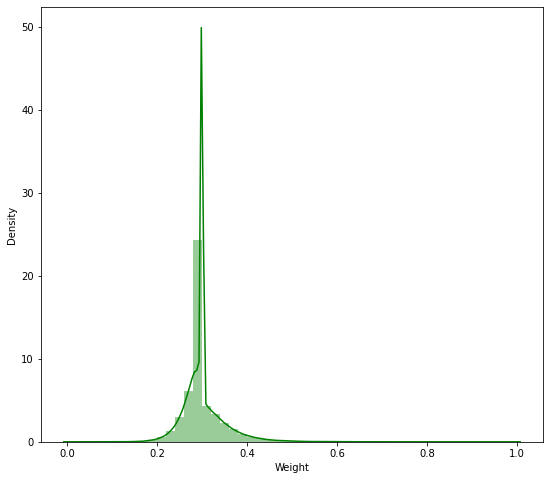

In [41]:
print(df_tabelanova['Weight'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_tabelanova['Weight'], color='g');

count   1,691,300.00
mean            0.00
std             0.06
min            -0.41
25%            -0.02
50%             0.00
75%             0.01
max             0.95
Name: Weight, dtype: float64


C:\Users\Diogo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


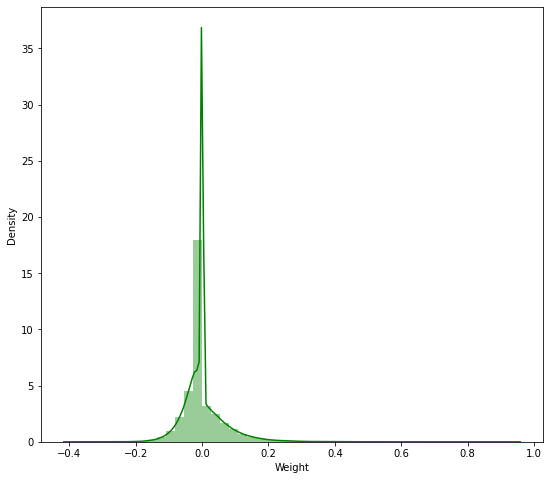

In [42]:
print(df_final_v1['Weight'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_final_v1['Weight'], color='g');

In [55]:
ValuePrimitiveMax = 0.2
ValueNormalizeMax = (ValuePrimitiveMax - df_final_v1 ['Weight'].min()) / (df_final_v1 ['Weight'].max() - df_final_v1 ['Weight'].min())
ValueNormalizeMax

0.44756995694821633

In [56]:
ValuePrimitiveMix = -0.2
ValueNormalizeMix = (ValuePrimitiveMix - df_final_v1 ['Weight'].min()) / (df_final_v1 ['Weight'].max() - df_final_v1 ['Weight'].min())
ValueNormalizeMix

0.15240488085102005

In [57]:
df_amostra_v1 = df_tabelanova.loc[(df_tabelanova['Weight'] <= ValueNormalizeMix)]

In [58]:
df_amostra_v1

,SOURCE,TARGET,Weight
38247,AIPIM TJ DESCASCADO CONGELADO PCT 1KG,LEITE FERM BATAVINHO TRADICIONAL 80G C/6,0.13
38961,AIPIM TJ DESCASCADO CONGELADO PCT 1KG,SUCO SUQ LARANJA INTEGRAL PET 2L,0.15
50089,APER FRIMESA TIRINHAS FRANGO CX 300G,MASSA PASTEL DA BOA DM PCT 400G,0.15
54130,APRESUNTADO JCW FATIADO PCT 150G,PIZZA AURORA CALABRESA CX 460G,0.15
54175,APRESUNTADO JCW FATIADO PCT 150G,PRESUNTO SEARA FAT PCT 200G,0.14
...,...,...,...
1681055,WAFFLE FORNO MINAS TRAD PCT 210G,BEB LACTEA VENEZA PESSEGO PCT 900G,0.15
1681087,WAFFLE FORNO MINAS TRAD PCT 210G,CAPELETTI DA BOA CARNE PCT 400G,0.11
1681088,WAFFLE FORNO MINAS TRAD PCT 210G,CAPELETTI DA BOA FRANGO PCT 400G,0.12
1682139,WAFFLE FORNO MINAS TRAD PCT 210G,SUCO CATARINA KIDS LARANJA PET 2L,0.14


In [59]:
df_amostra = df_final_v1.loc[(df_final_v1['Weight'] <= -0.2)]

In [60]:
df_amostra

,SOURCE,TARGET,Weight
38277,AIPIM TJ DESCASCADO CONGELADO PCT 1KG,LEITE FERM BATAVINHO TRADICIONAL 80G C/6,-0.23
38991,AIPIM TJ DESCASCADO CONGELADO PCT 1KG,SUCO SUQ LARANJA INTEGRAL PET 2L,-0.20
50128,APER FRIMESA TIRINHAS FRANGO CX 300G,MASSA PASTEL DA BOA DM PCT 400G,-0.20
54172,APRESUNTADO JCW FATIADO PCT 150G,PIZZA AURORA CALABRESA CX 460G,-0.20
54217,APRESUNTADO JCW FATIADO PCT 150G,PRESUNTO SEARA FAT PCT 200G,-0.22
...,...,...,...
1682348,WAFFLE FORNO MINAS TRAD PCT 210G,BEB LACTEA VENEZA PESSEGO PCT 900G,-0.21
1682380,WAFFLE FORNO MINAS TRAD PCT 210G,CAPELETTI DA BOA CARNE PCT 400G,-0.26
1682381,WAFFLE FORNO MINAS TRAD PCT 210G,CAPELETTI DA BOA FRANGO PCT 400G,-0.25
1683432,WAFFLE FORNO MINAS TRAD PCT 210G,SUCO CATARINA KIDS LARANJA PET 2L,-0.21


In [61]:
# CHANGE DATATYPE
df_sna = df_amostra_v1.astype({"SOURCE":'category', "TARGET":'category', "Weight":'float16'})
print()

In [62]:
df_sna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 38247 to 1690690
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   SOURCE  1180 non-null   category
 1   TARGET  1180 non-null   category
 2   Weight  1180 non-null   float16 
dtypes: category(2), float16(1)
memory usage: 40.1 KB


In [63]:
df_amostra_v1.nunique()

SOURCE     274
TARGET     236
Weight    1179
dtype: int64